In [0]:
import numpy as np
import pandas as pd
import missingno as msno
import seaborn as sn
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
data=files.upload()

Saving winequality-white.csv to winequality-white.csv


In [0]:
# Reading the data
data = pd.read_csv('winequality-white.csv', sep = ';')

In [0]:
data.head(10)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
5,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
6,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6
7,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
8,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
9,8.1,0.22,0.43,1.5,0.044,28.0,129.0,0.9938,3.22,0.45,11.0,6


#Feature Analysis

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:454: FutureWarning: remove_na is deprecated and is a private function. Do not use.
  box_data = remove_na(group_data)


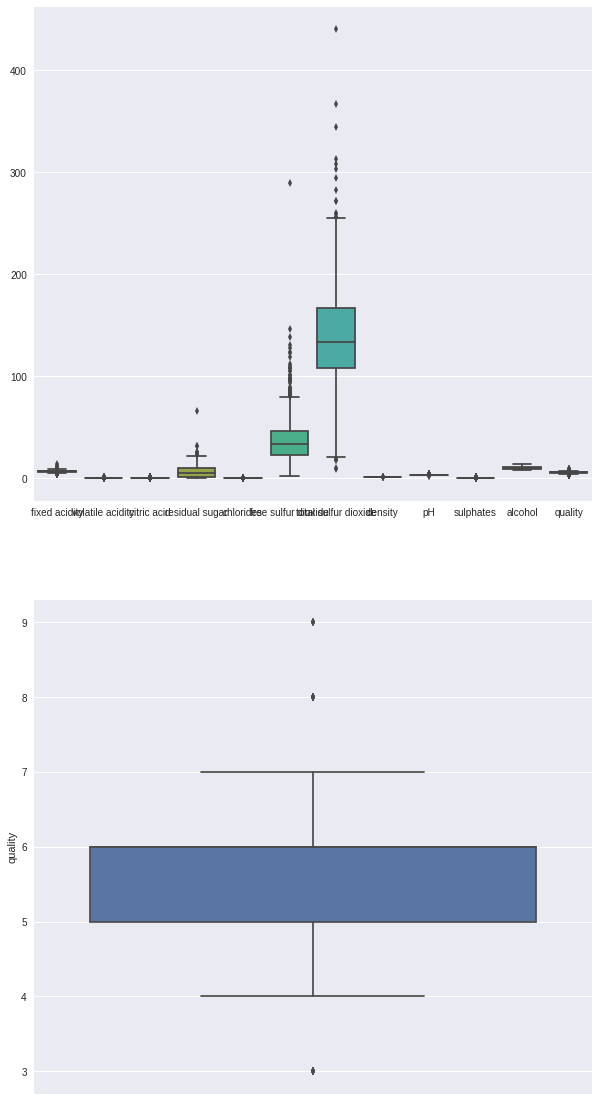

In [0]:
# Distribution
fig, axes = plt.subplots(nrows=2,ncols=1)
fig.set_size_inches(10, 20)
sn.boxplot(data=data,orient="v",ax=axes[0])
sn.boxplot(data=data,y="quality",orient="pH",ax=axes[1])


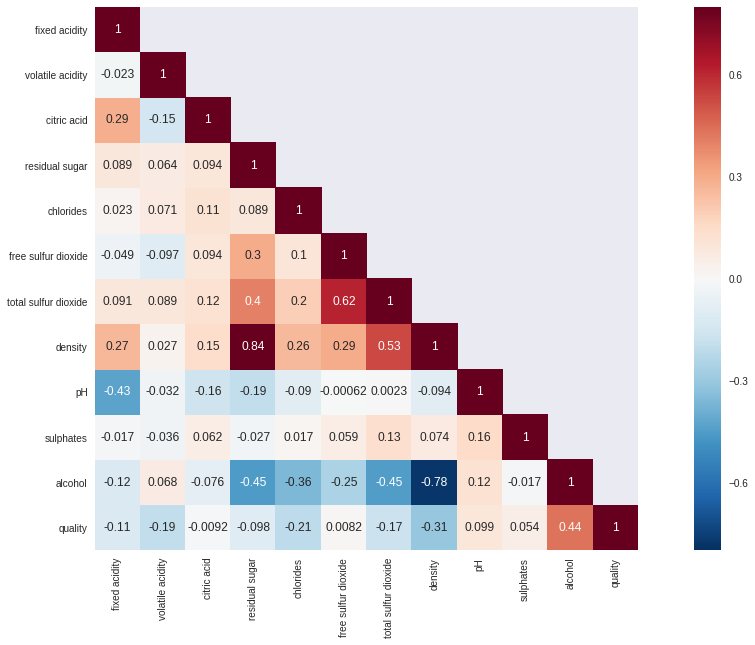

In [0]:

# Correlation analasys
corrMatt = data.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

#Multiple Linear Regression

In [0]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [0]:
# Reading the data

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [0]:
# Adding extra Columnt
X = np.append(arr = np.ones((X.shape[0], 1)), values = X, axis = 1)

In [0]:
# Splitting the data
X_train, X_test, y_train, y_test = train_test_split(X, y)


In [0]:
# Scaling the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [0]:
# Linear regressiong
regressor = LinearRegression()
regressor.fit(X_train, y_train)
predictions = regressor.predict(X_test)

r2_score(y_test, predictions)

0.31198640986838466

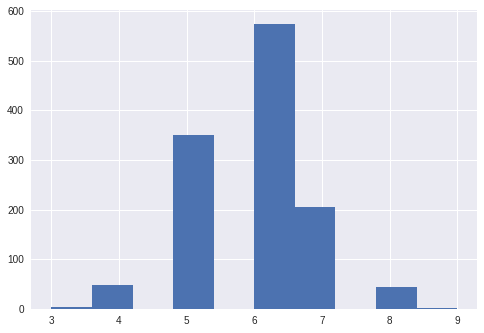

In [0]:
y_test.hist()

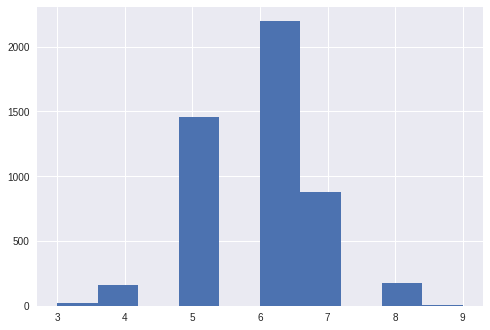

In [0]:
data['quality'].hist()

In [0]:
# Backwards elimination
import statsmodels.formula.api as sm
X_opt = X[:, [0, 1, 2, 4, 6, 8, 9, 10, 11]]
regressor_OLS = sm.OLS(endog = y, exog = X_opt).fit()
regressor_OLS.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                quality   R-squared:                       0.282
Model:                            OLS   Adj. R-squared:                  0.281
Method:                 Least Squares   F-statistic:                     239.7
Date:                Mon, 31 Dec 2018   Prob (F-statistic):               0.00
Time:                        20:11:34   Log-Likelihood:                -5544.1
No. Observations:                4898   AIC:                         1.111e+04
Df Residuals:                    4889   BIC:                         1.116e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        154.1062     18.100      8.514      0.000     118.622     189.591
x1             0.0681      0.020      3.333      0.001       0.028       0.108
x2            -1.8881      0.110    -17.242      0.000      -2.103      -1.673
x3             0.0828      0.007     11.370      0.000       0.069       0.097
x4             0.0033      0.001      4.950      0.000       0.002       0.005
x5          -154.2913     18.344     -8.411      0.000    -190.254    -118.329
x6             0.6942      0.103      6.717      0.000       0.492       0.897
x7             0.6285      0.100      6.287      0.000       0.433       0.824
x8             0.1932      0.024      8.021      0.000       0.146       0.240
==============================================================================
Omnibus:                      114.194   Durbin-Watson:                   1.621
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              251.255
Skew:                           0.075   Prob(JB):                     2.76e-55
Kurtosis:                       4.099   Cond. No.                     9.95e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.95e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

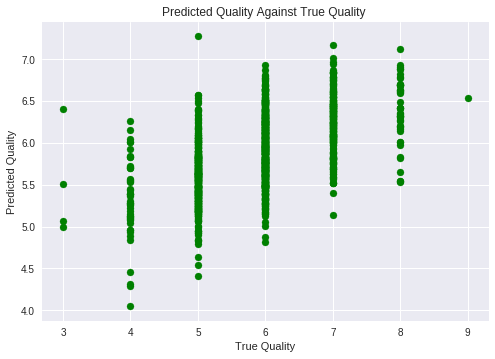

In [0]:
# Displaying the results
import matplotlib.pylab as plt
plt.scatter(y_test, predictions, c='g')
plt.xlabel('True Quality')
plt.ylabel('Predicted Quality')
plt.title('Predicted Quality Against True Quality ')
plt.show()

#Logistic Regression

In [0]:
# Reading the data

X = data.iloc[:, :-1]
y = data.iloc[:, -1]


In [0]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7,stratify=y)


In [0]:
from sklearn.linear_model import LogisticRegression 
lr = LogisticRegression() 
lr.fit(X_train,y_train) 

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [0]:
y_pred = lr.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score 
accuracy_score(y_test,y_pred)

0.5357142857142857

In [0]:
y_pred_proba = lr.predict_proba(X_test)
y_pred_proba


array([[1.27762520e-03, 1.35182148e-01, 5.62329525e-01, ...,
        5.20812295e-02, 7.27045793e-03, 3.57869890e-03],
       [5.94313892e-03, 1.02305388e-02, 3.96544194e-01, ...,
        1.16083203e-01, 2.10476132e-02, 1.86944824e-04],
       [2.98290844e-03, 2.97599410e-02, 3.68660386e-01, ...,
        1.03167002e-01, 8.70191288e-03, 9.58284561e-04],
       ...,
       [5.26748369e-04, 4.36187421e-02, 2.51779366e-01, ...,
        1.80304112e-01, 1.74245251e-02, 3.10598498e-03],
       [4.67450536e-03, 6.61058714e-02, 4.26298018e-01, ...,
        9.46794780e-02, 1.15056564e-02, 1.19004173e-03],
       [6.04871667e-04, 2.16095064e-02, 9.42223885e-02, ...,
        3.46748386e-01, 5.64753984e-02, 3.31432554e-03]])

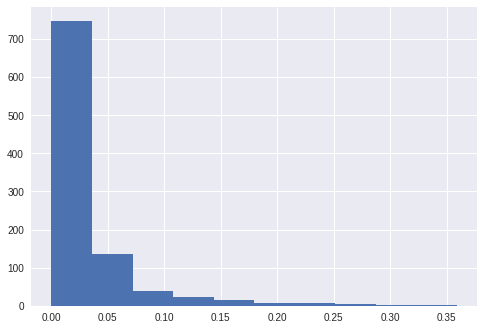

In [0]:
pd.Series(y_pred_proba[:,1]).hist()
